In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=4
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this Hamiltonian and convert it into a `HartreeFockHamiltonian` class in Python.

First, I need to analyze the equation to identify dimensions and basis order.

The equation describes a system with $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$, which appears to be a 3-component vector of creation operators. The subscript $s$ seems to indicate spin, which typically has two values (up and down). And $\kk$ represents momentum.

Looking at the Hamiltonian matrix $\HH_{\kk s}$, it's a 3x3 matrix, where each element maps to interactions between the three orbital types: $p_x$, $p_y$, and $d$.

So the flavors here are:
1. Spin (s): up and down (2 values)
2. Orbital: $p_x$, $p_y$, and $d$ (3 values)

Therefore, D = (2, 3)

Now, let's understand the basis order:
- The first index (0) corresponds to spin: 0 for up, 1 for down.
- The second index (1) corresponds to the orbi

In [7]:
print(generated_code['thinking'])

Let's break down this Hamiltonian and convert it into a `HartreeFockHamiltonian` class in Python.

First, I need to analyze the equation to identify dimensions and basis order.

The equation describes a system with $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$, which appears to be a 3-component vector of creation operators. The subscript $s$ seems to indicate spin, which typically has two values (up and down). And $\kk$ represents momentum.

Looking at the Hamiltonian matrix $\HH_{\kk s}$, it's a 3x3 matrix, where each element maps to interactions between the three orbital types: $p_x$, $p_y$, and $d$.

So the flavors here are:
1. Spin (s): up and down (2 values)
2. Orbital: $p_x$, $p_y$, and $d$ (3 values)

Therefore, D = (2, 3)

Now, let's understand the basis order:
- The first index (0) corresponds to spin: 0 for up, 1 for down.
- The second index (1) corresponds to the orbitals: 0 for $p_x$, 1 for $p_y$, 2 for $d$.

Next, I n

In [8]:
print(generated_code['text'])

# Analysis of the Hamiltonian and Class Implementation

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I can see that $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ represents a 3-component vector of creation operators where:
- $s$ is the spin index (up, down)
- The components represent different orbitals: $p_x$, $p_y$, and $d$

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up (0), down (1)
1: orbital. Order: p_x (0), p_y (1), d (2)

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS: {
    "n^p": "Total density of holes on oxygen sites: np.real(exp_val[0, 0, 0, 0, :].mean() + exp_val[1, 0, 1, 0, :].mean() + exp_val[0, 1, 0, 1, :].mean() + exp_val[1, 1, 1, 1, :].mean())",
    "eta": "Nematic order parameter: np.real((exp_val[0, 0, 0, 0, :].mean() + exp_val[1, 0, 1, 0, :].mean()) - (exp_val[0, 1, 0, 1, :].mean() + exp_val[1, 1, 1, 1, :].mean()))",
    "n": "Total density of hole

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a system with p_x, p_y, and d orbitals.
  
  Args:
    N_shell (int): Number of shells in the first Brillouin zone.
    parameters (dict): Dictionary containing model parameters.
      - t_pd (float): Hopping parameter between p and d orbitals.
      - t_pp (float): Hopping parameter between p orbitals.
      - Delta (float): Energy difference between p and d orbitals.
      - U_p (float): Coulomb repulsion on p orbitals.
      - V_pp (float): Inter-site Coulomb repulsion between p orbitals.
      - U_d (float): Coulomb repulsion on d orbital.
      - V_pd (float): Inter-site Coulomb repulsion between p and d orbitals.
      - T (float): Temperature (default: 0).
      - a (float): Lattice constant (default: 1.0).
    filling_factor (float): Filling factor (default: 0.5).
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_pd':1.0, 't_pp':1.

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_4.py


# Code evaluation

In [4]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [5]:
import importlib

In [6]:
module = importlib.import_module(code_path)

In [7]:
import HF

## Task 1: Check k-space

In [8]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

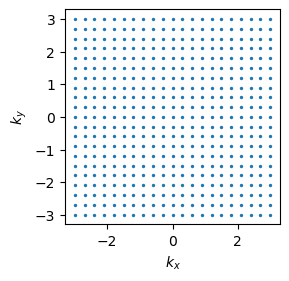

In [9]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [10]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [11]:
h_nonint = ham.generate_non_interacting()

In [12]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

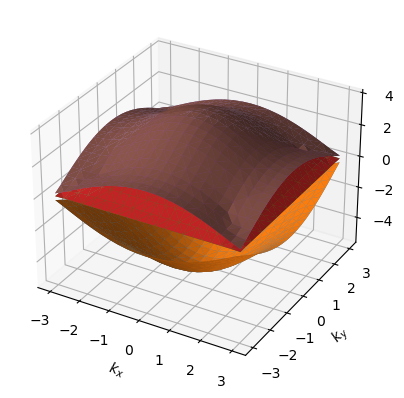

In [13]:
utils_auto.plot_2d_bandstructure(ham,en)

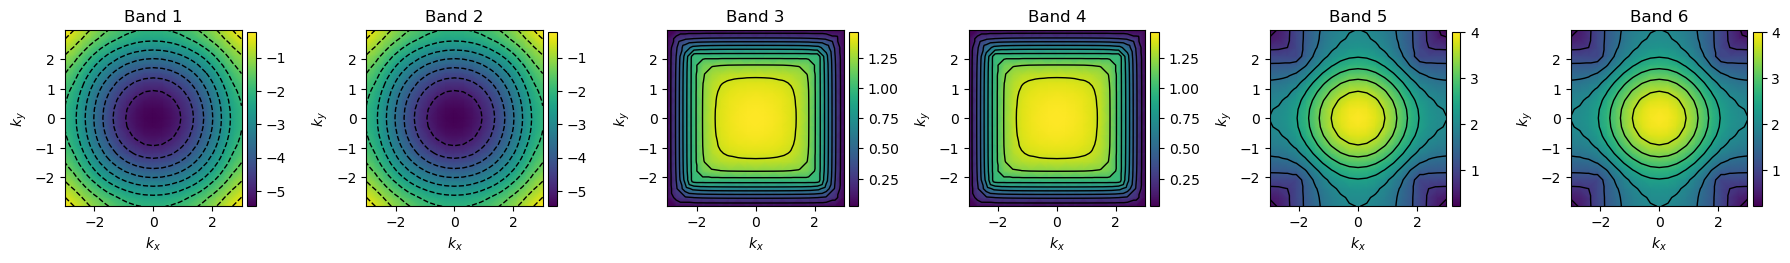

In [14]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [15]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [16]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [17]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


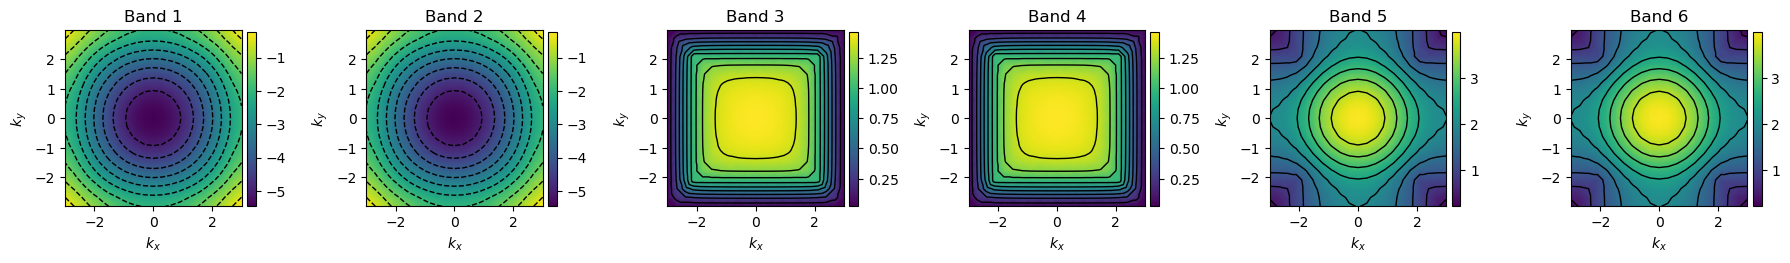

In [18]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [19]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [20]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [21]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


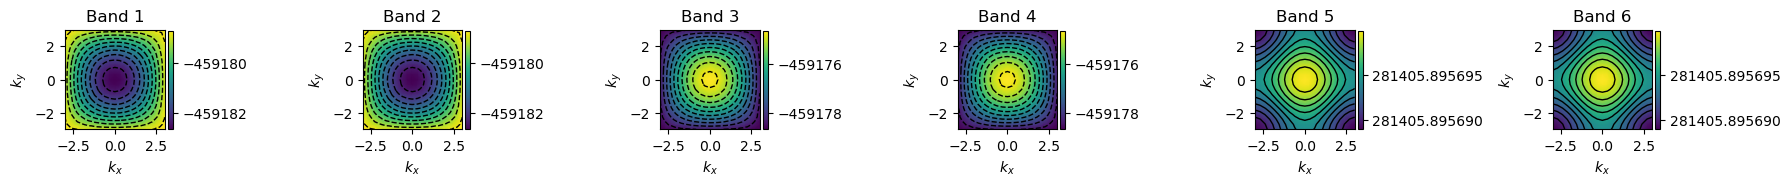

In [22]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [23]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 0.04
U/T is 57081.40
mean_U is 26466.87


# Auto eval

## Task 1

In [24]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the
Let me analyze the given image and determine if it correctly represents a momentum space mesh in the first Brillouin zone for the given Hamiltonian problem, considering the point group symmetry.

From the image:
1. It shows a 2D grid of points in k-space (momentum space)
2. The axes are labeled as k_x and k_y
3. The grid extends from approximately -3 to 3 in both directions
4. The points form a uniform square grid

Now let me consider what we would expect for this problem:

The Hamiltonian is for a square lattice system, as stated in the problem description. For a square lattice:
- The first Brillouin zone is a square in reciprocal space
- It typically extends from -π to π in both k_x and k_y directions (or sometimes from 0 to 2π, depending on convention)
- The point group symmetry of a square lattice is C4v, which includes 4-fold rotational symmetry (90° rotations) and reflections

Looking at the image:
1. The gri

In [25]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [26]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze
Let me analyze the Hamiltonian and the corresponding band structure plots shown in the image to determine if they correctly represent a square lattice system.

The image shows 6 different bands (Band 1 through Band 6) plotted in the first Brillouin zone, with false color and contour lines indicating the energy values at each k-point.

Let's go through the rubric point by point:

1. **Shape of the Brillouin zone boundary**: 
   From the plots, I can see that the Brillouin zone is shown as a square region where k_x and k_y range approximately from -3 to 3 (with the main focus being the region from -2 to 2). This square shape is consistent with what we expect for a square lattice in real space, which has a square Brillouin zone in k-space.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - Bands 1 & 2: The highest energy (yellow) regions are at the corners of the shown region.
 

In [27]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [28]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu='1/3')
    )


#################### THINKING ####################

Let's work through
Let's work through the rubric systematically to evaluate the band structure plots shown in the image.

First, I need to understand what's shown in the image:
- The image shows 6 panels labeled Band 1 through Band 6
- Each panel shows a false color plot in the k_x, k_y plane (momentum space)
- These represent the energy bands in the first Brillouin zone after self-consistent Hartree-Fock calculation
- We need to analyze the symmetry and band gap properties

Let's go through each point in the rubric:

1. Identify the shape of the Brillouin zone boundary:
   - In each panel, the Brillouin zone is shown as a square with boundaries at approximately k_x = ±π and k_y = ±π (shown as approximately ±2 in the axes)
   - This square shape is consistent with what's expected for a square lattice
   - So this point is CORRECT

2. Examine the symmetry of the energy distribution:

   2.1 Identify the highest energy regions (yellow)

In [29]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [30]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper, nu='1/3',U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Alright,
Alright, so I'm presented with an image showing false color plots of 6 different bands (Band 1 through Band 6) in momentum space (k-space), where the x and y axes represent k_x and k_y components of the crystal momentum. These plots show the energy distribution within the first Brillouin zone after a self-consistent Hartree-Fock calculation with large interaction limit.

Let me analyze this according to the rubric:

1. Shape of the Brillouin zone boundary:
   From the plots, I can see that the k_x and k_y axes extend from -2.5 to 2.5 in each direction, forming a square region. This is consistent with the Brillouin zone of a square lattice, which should indeed be square-shaped. So this criterion appears to be satisfied.

2. Symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
      - In Bands 1 & 2: The highest energy is in the center (k_x=0, k_y=0)
      - In Bands 3 & 4: The highest energy forms a ci

In [31]:
answer4=utils_auto.extract_result_content(result4['text'])

In [32]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '4' saved to final_answer.yaml
